In [28]:
import pickle
import numpy as np
import pandas as pd
import os
from copy import deepcopy
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.animation

import pypolo2

# Environment -- PINNS

In [29]:
Setting = pypolo2.utilities.Config()
strategy_name = ["PINNsOnlySpray",
                 "SequentialSpray"]
comparing_variables = ["teamsize_2","teamsize_4","teamsize_6"]
seed = 0
team_size = 4
Setting.sourcenum = 4
pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{Setting.sche_step}_AS{Setting.adaptive_step}_SN{Setting.sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'


In [30]:
stategy = strategy_name[1]
comparing_variable = comparing_variables[1]
pkldir = './outputs/' + stategy + '/' + comparing_variable + '/' + pklname + ".pkl"
data = pypolo2.experiments.utilities.readpkl(pkldir)
# print(data)

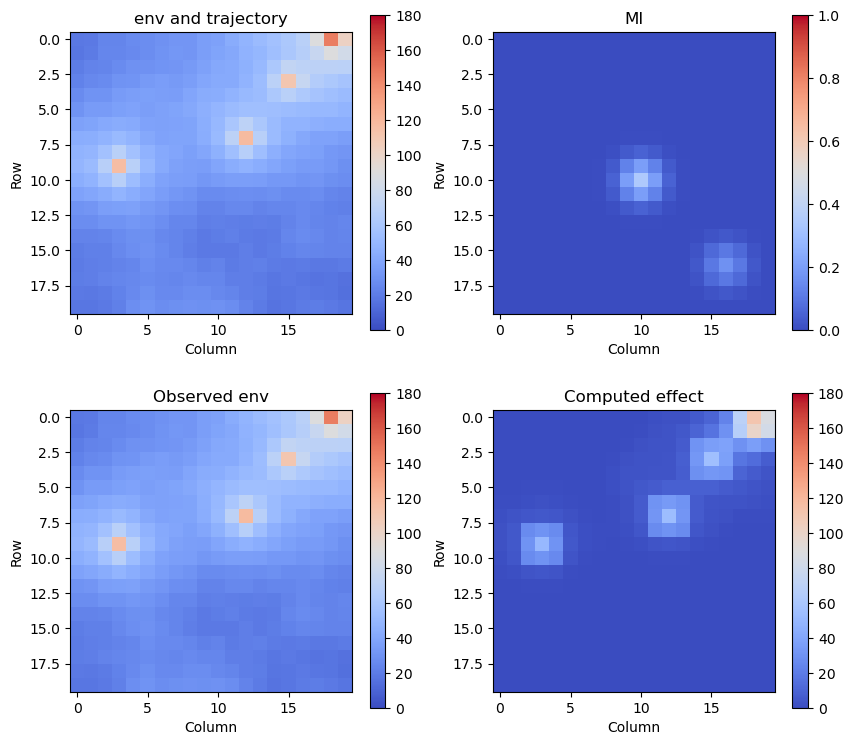

In [31]:
from pypolo2.experiments import visualizer
fig, axs = plt.subplots(2, 2, figsize=(10, 9))
ax1, ax2 = axs[0]
ax3, ax4 = axs[1]

ax1.set_title('env and trajectory')
ax1.set_xlabel('Column')
ax1.set_ylabel('Row')

ax2.set_title('MI')
ax2.set_xlabel('Column')
ax2.set_ylabel('Row')

ax3.set_title('Observed env')
ax3.set_xlabel('Column')
ax3.set_ylabel('Row')

ax4.set_title('Computed effect')
ax4.set_xlabel('Column')
ax4.set_ylabel('Row')

# Set axis limits for both subplots
ax1.axis([-0.5, 19.5, -0.5, 19.5])
ax2.axis([-0.5, 19.5, -0.5, 19.5])
ax3.axis([-0.5, 19.5, -0.5, 19.5])
ax4.axis([-0.5, 19.5, -0.5, 19.5])

# Invert y-axis for both subplots
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

# Create heatmap objects for both subplots
heatmap1 = data['truth_env'][0]
heatmap2 = data['MI_information'][0]
heatmap3 = data['observed_env'][0]
heatmap4 = data['computed_effect'][0]

im1 = ax1.imshow(heatmap1, cmap=cm.coolwarm, interpolation='nearest', origin='lower')
im2 = ax2.imshow(heatmap2, cmap=cm.coolwarm, interpolation='nearest', origin='lower')
im3 = ax3.imshow(heatmap3, cmap=cm.coolwarm, interpolation='nearest', origin='lower')
im4 = ax4.imshow(heatmap4, cmap=cm.coolwarm, interpolation='nearest', origin='lower')

# Add colorbars to both subplots
cbar1 = fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2)
cbar3 = fig.colorbar(im3, ax=ax3)
cbar4 = fig.colorbar(im4, ax=ax4)

# Plot the initial trajectory on the third subplot
l_list = []
arr = dict()
for id in range(data['info']['team_size']):
    arr[id+1] = []
for step in range(len(data['time_series'])):
    for id in range(len(data['time_series'][step]['state'])):
        state = data['time_series'][step]['state'][id+1]
        arr[id+1].append(state)
for id in range(data['info']['team_size']):     
    arr[id+1] = np.array(arr[id+1])
    # l, = ax1.plot([],[], color='black', linewidth=1)
    l, = ax1.plot([],[], color='black', linewidth=1 + 0.5*id)
    l_list.append(l)

# Define animate function for both subplots
def animate(i):
    heatmap1 = data['truth_env'][i]
    heatmap2 = data['MI_information'][i]
    heatmap3 = data['observed_env'][i]
    heatmap4 = data['computed_effect'][i]
    
    im1.set_data(heatmap1)
    im2.set_data(heatmap2)
    im3.set_data(heatmap3)
    im4.set_data(heatmap4)
    
    # Adjust the color range of the heatmap
    im1.set_clim(vmin=0, vmax=180)
    im2.set_clim(vmin=0, vmax=1.0)
    im3.set_clim(vmin=0, vmax=180)
    im4.set_clim(vmin=0, vmax=180)
    
    for id in range(data['info']['team_size']):
        traj = arr[id+1]
        # Extract the x-coordinates and y-coordinates up to time i
        x = traj[:i+1, 0]
        y = traj[:i+1, 1]
        # Update the trajectory with the current x and y coordinates
        l_list[id].set_data(y, x)

    return im1, im2, im3, im4, l_list

# Create animation object for both subplots
ani = matplotlib.animation.FuncAnimation(fig, animate, frames = len(data['time_series']))

# Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
select_time = 60
mean_airpollution = []
for comparing_variable in comparing_variables:
    list = []
    for stategy in strategy_name:
        pkldir = './outputs/' + stategy + '/' + comparing_variable + '/' + pklname + ".pkl"
        data = pypolo2.experiments.utilities.readpkl(pkldir)
        list.append(data)
    mean_airpollution.append(list)
# mean_airpollution = np.array(mean_airpollution)
print(mean_airpollution[0][0])